<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo Fin de Máster</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Autor: César Fernández Domínguez</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Construcción y evaluación de modelos de predicción de contaminación del aire en la ciudad de Barcelona

#TODO#:

 <ol start="1">
  <li>Carga de conjuntos de datos
  <br>1.1 Carga de datos horarios de calidad del aire
  <br>1.2 Carga de datos horarios de variables meteorológicas
  <br>1.3 Carga de datos horarios de información de tránsito de vehiculos
  <li>Integración y preparación de los datos
  <li>Reducción y selección de variables independientes
  <li>Creación de los modelos de predicción 
  <li>Evaluación de los modelos de predicción
  <li>Presentación de resultados
</ol>
   
Para ello vamos a necesitar las siguientes librerías:

In [1]:
import sys, time
import numpy as np
import pandas as pd
import datetime as dt
import folium
import random
import seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.pylab import rcParams
from statistics import mean
from functools import reduce
%matplotlib inline
pd.set_option('display.max_columns', None)
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 10

# 1. Carga del conjunto de datos

#TODO#

## 1.1. Carga de datos horarios de calidad del aire

#TODO#

In [2]:
# Read air data file
filename = "../data/data_air_hourly_red.csv"
data_air_hourly = pd.read_csv(filename, sep=',', encoding = "UTF-8")
data_air_hourly['DATA'] = pd.DatetimeIndex(data_air_hourly['DATA'])
data_air_hourly=data_air_hourly.sort_values(by=['DATA'])
data_air_hourly.head()

,DATA,CO,NO,NO2,NOX,O3,PM10,SO2,CODI_EOI
0,2010-01-01,0.2,1.0,4.0,NaN,79.0,NaN,2.0,8019054
1,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8019043
2,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8019057
3,2010-01-01,0.2,3.0,12.0,17.0,44.0,NaN,1.0,8019004
4,2010-01-01,0.2,3.0,13.0,NaN,64.0,NaN,NaN,8019044


#TODO#

In [3]:
# Read imputated air data file
filename = "../data/data_air_hourly_imp.csv"
data_air_hourly_imp = pd.read_csv(filename, sep=',', encoding = "UTF-8")
data_air_hourly_imp['DATA'] = pd.DatetimeIndex(data_air_hourly_imp['DATA'])
data_air_hourly_imp=data_air_hourly_imp.sort_values(by=['DATA'])
data_air_hourly_imp.head()

,DATA,CO,NO,NO2,NOX,O3,PM10,SO2,CODI_EOI
0,2010-01-01,0.200000,1.000000,4.000000,69.619048,79.000000,NaN,2.000000,8019054
1,2010-01-01,0.304762,21.066667,59.742857,92.476190,63.833333,NaN,2.011905,8019057
2,2010-01-01,0.200000,3.000000,12.000000,17.000000,44.000000,NaN,1.000000,8019004
3,2010-01-01,NaN,9.638095,5.457143,19.142857,83.833333,NaN,NaN,8019058
4,2010-01-01,1.200000,3.000000,27.000000,30.000000,55.000000,NaN,4.000000,8019050


#TODO#

In [4]:
# Read air stations data file
filename = "../data/data_air_stations.csv"
data_air_stations = pd.read_csv(filename, sep=',', encoding = "UTF-8")
data_air_stations

,CODI_EOI,NOM_ESTACIO,TIPUS_ESTACIO,AREA URBANA,LATITUD,LONGITUD,ALTITUD,CONTAMINANT
0,8019003,Barcelona (St. Gervasi),traffic,urban,41.401128,2.146942,75.0,['H2S' 'NOX']
1,8019004,Barcelona (Poblenou),background,urban,41.403878,2.204501,3.0,['CO' 'NO' 'NO2' 'NOX' 'O3' 'PM10' 'SO2']
2,8019039,Barcelona (Sagrera),traffic,urban,41.422213,2.190555,12.0,['NOX']
3,8019042,Barcelona (Sants),traffic,urban,41.378783,2.133099,35.0,['CO' 'NO' 'NO2' 'NOX' 'SO2']
4,8019043,Barcelona (Eixample),traffic,urban,41.385314,2.153800,26.0,['CO' 'NO' 'NO2' 'NOX' 'O3' 'PM10' 'SO2']
5,8019044,Barcelona (Gracia - Sant Gervasi),traffic,urban,41.398722,2.153399,57.0,['CO' 'NO' 'NO2' 'NOX' 'O3' 'PM10' 'SO2']
6,8019050,Barcelona (Ciutadella),background,urban,41.386403,2.187398,7.0,['CO' 'NO' 'NO2' 'NOX' 'O3']
7,8019054,Barcelona (Parc Vall Hebron),background,urban,41.426109,2.148002,136.0,['CO' 'NO' 'NO2' 'NOX' 'O3' 'PM10' 'SO2']
8,8019056,Barcelona (Torre Girona),background,urban,41.389726,2.115836,81.0,['PM10' 'CO' 'H2S' 'NO' 'NO2' 'NOX' 'O3' 'SO2'...
9,8019057,Barcelona (Palau Reial),background,urban,41.387492,2.115200,81.0,['CO' 'NO' 'NO2' 'NOX' 'O3' 'PM10' 'SO2']


## 1.2. Carga de datos horarios de variables meteorológicas

#TODO#

In [5]:
# Read meteo data file
filename = "../data/data_meteo_hourly_red.csv"
data_meteo_hourly = pd.read_csv(filename, sep=',', encoding = "UTF-8")
data_meteo_hourly = data_meteo_hourly.rename(columns={"data_lectura": "DATA"})
data_meteo_hourly['DATA'] = pd.DatetimeIndex(data_meteo_hourly['DATA'])
data_meteo_hourly=data_meteo_hourly.sort_values(by=['DATA'])
data_meteo_hourly.head()

,codi_estacio,DATA,DV10,DVVx10,HR,HRn,HRx,P,PPT,PPTx1min,Pn,Px,RS,T,Tn,Tx,VV10,VVx10
0,D5,2010-01-01 00:00:00,235.0,261.0,57.0,56.0,58.0,946.0,0.0,0.0,946.0,947.0,0.0,8.2,8.0,8.3,9.7,17.3
1,X8,2010-01-01 00:00:00,273.0,276.0,50.0,49.0,51.0,985.0,0.0,0.0,985.0,986.0,0.0,11.2,11.0,11.4,6.1,11.1
2,X4,2010-01-01 00:00:00,276.0,280.0,44.0,43.0,46.0,990.0,0.0,0.0,990.0,991.0,0.0,12.1,11.8,12.4,5.7,15.6
3,X8,2010-01-01 01:00:00,282.0,259.0,49.0,49.0,50.0,986.0,0.0,0.0,985.0,986.0,0.0,10.5,10.4,10.7,5.6,12.1
4,X4,2010-01-01 01:00:00,290.0,305.0,44.0,43.0,46.0,991.0,0.0,0.0,990.0,991.0,0.0,11.5,11.2,11.8,7.2,16.1


## 1.3. Carga de datos horarios de información de tránsito de vehiculos

#TODO#

In [6]:
# Read trafic data file
filename = "../data/data_trafico_red.csv"
data_trafic = pd.read_csv(filename, sep=',', encoding = "UTF-8")
data_trafic = data_trafic.rename(columns={"data": "DATA", "codi_eoi": "CODI_EOI"})
data_trafic['DATA'] = pd.DatetimeIndex(data_trafic['DATA'])
data_trafic=data_trafic.sort_values(by=['DATA'])
data_trafic.head()

,DATA,estatActual,CODI_EOI
0,2017-10-01 00:20:55,2,8019058
716600,2017-10-01 00:20:55,0,8019044
573280,2017-10-01 00:20:55,2,8019043
429960,2017-10-01 00:20:55,0,8019050
1003240,2017-10-01 00:20:55,2,8019057


# 2. Integración y preparación de los datos

#TODO#

In [7]:
data_in = data_air_hourly_imp
datas = pd.DataFrame()
stations=data_in['CODI_EOI'].unique()
variables = np.delete(data_in.columns, np.where(np.isin(data_in.columns, ['CODI_EOI', 'DATA'])))
for station in stations:
    row = {'CODI_EOI':[station]}
    row['NOM_ESTACIO']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'NOM_ESTACIO'].iloc[0]]
    row['TIPUS_ESTACIO']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'TIPUS_ESTACIO'].iloc[0]]
    row['AREA URBANA']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'AREA URBANA'].iloc[0]]
    for variable in variables:
        data=data_in.loc[data_in['CODI_EOI'] == station,].set_index('DATA')
        ts = pd.Series(data[variable].values, index=data.index)
        first_valid_index = ts.first_valid_index()
        row[variable] = [None if first_valid_index is None else first_valid_index.strftime('%Y-%m-%d')]
        last_valid_index = ts.last_valid_index()
        #row[variable+'_last'] = [None if last_valid_index is None else last_valid_index.strftime('%Y-%m-%d')]
    datas = datas.append(pd.DataFrame.from_dict(row), ignore_index=True, sort=False)
datas.set_index('CODI_EOI')
datas

,CODI_EOI,NOM_ESTACIO,TIPUS_ESTACIO,AREA URBANA,CO,NO,NO2,NOX,O3,PM10,SO2
0,8019054,Barcelona (Parc Vall Hebron),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,2010-01-01
1,8019057,Barcelona (Palau Reial),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,2010-01-01
2,8019004,Barcelona (Poblenou),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,2010-01-01
3,8019058,Barcelona (Observatori Fabra),background,suburban,None,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,None
4,8019050,Barcelona (Ciutadella),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,None,2010-01-01
5,8019042,Barcelona (Sants),traffic,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,None,None,2010-01-01
6,8019044,Barcelona (Gracia - Sant Gervasi),traffic,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,2010-01-01
7,8019043,Barcelona (Eixample),traffic,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2011-01-01,2010-01-01


#TODO#

In [8]:
data_air_hourly=data_air_hourly.drop('PM10', axis=1)
data_air_hourly=data_air_hourly[~data_air_hourly['CODI_EOI'].isin([8019042,8019058])]
data_air_hourly_imp=data_air_hourly_imp.drop('PM10', axis=1)
data_air_hourly_imp=data_air_hourly_imp[~data_air_hourly_imp['CODI_EOI'].isin([8019042,8019058])]

#TODO#

In [9]:
air_to_meteo_station_lut = {
    8019058:'D5', 8019054:'D5',
    8019004:'X4',8019050:'X4',8019043:'X4',8019044:'X4',
    8019042:'X8',8019057:'X8'}

def get_data_station(station, data_air, data_meteo, data_trafic):

    codiStation=air_to_meteo_station_lut[station]
    
    data_air_station=data_air.loc[data_air['CODI_EOI'] == station,].drop(['CODI_EOI'], axis=1)
    data_meteo_station=data_meteo.loc[data_meteo['codi_estacio'] == codiStation,].drop(['codi_estacio'], axis=1)
    data_trafic_station=data_trafic.loc[data_trafic['CODI_EOI'] == station,].drop(['CODI_EOI'], axis=1)
    
    dfs=[data_air_station,data_meteo_station,data_trafic_station]
    data_station = reduce(lambda left,right: pd.merge(left, right, on=['DATA'], how='outer'), dfs)
    data_station = data_station.sort_values(by=['DATA'])
    return data_station

#TODO#

In [10]:
def data_imputation (data, col_date='DATA',var_cols=None):
    
    if not var_cols:
        var_cols = np.delete(data.columns, np.where(np.isin(data.columns, [col_date])))

    # Obtain new column 'at_day_time' to calculate mean station value at a specific day and hour
    at_day_hour_column = 'at_day_hour'
    data[at_day_hour_column] = data[col_date].apply(lambda x: x.strftime('0228%H') if (x.month == 2 and x.day == 29) else x.strftime('%m%d%H'))
    data_mean_dayhour = data.drop(col_date, axis=1).groupby([at_day_hour_column])[var_cols].max()
    data.drop(at_day_hour_column, axis=1)

    data_imputated = pd.DataFrame()
    datas = data[np.concatenate([[col_date], var_cols])].set_index(col_date)
    for var in var_cols:
        indexes = datas[var].index[datas[var].apply(np.isnan)]
        mean_dayhour = np.empty(0)
        for index in indexes:
            dayhour = index.strftime('0228%H') if (index.month == 2 and index.day == 29) else index.strftime('%m%d%H') 
            mean_dayhour = np.append(mean_dayhour, data_mean_dayhour.loc[(dayhour),var])

        datas.loc[indexes,var] = mean_dayhour
    data_imputated = data_imputated.append(datas)
    data_imputated = data_imputated.reset_index().sort_values(by=col_date)
    
    return data_imputated

# 3. Reducción y selección de variables independientes

#TODO#

In [11]:
station = 8019044
data_air_in = data_air_hourly_imp
data_hourly = get_data_station(station, data_air_in, data_meteo_hourly, data_trafic)
data_hourly_imp = data_hourly.set_index('DATA')
data_hourly_imp[['estatActual']] = data_imputation(data_hourly, var_cols=['estatActual']).set_index('DATA')

data_daily = data_hourly_imp.reset_index().set_index('DATA').resample('D').mean()

#TODO#

Finalmente, para comparar las distribuciones de los atributos podemos aplicar un índice de correlación lineal o de rango, como por ejemplo Pearson, Kendall o Spearman. Cualquiera de estos tres índices lo podemos aplicar utilizando el método: DataFrame.corr(method : {‘pearson’, ‘kendall’, ‘spearman’}) incluido en la libreria pandas.

In [12]:
#method : {‘pearson’, ‘kendall’, ‘spearman’}
data_daily.corr(method='pearson')

,CO,NO,NO2,NOX,O3,SO2,DV10,DVVx10,HR,HRn,HRx,P,PPT,PPTx1min,Pn,Px,RS,T,Tn,Tx,VV10,VVx10,estatActual
CO,1.000000,0.770781,0.705335,0.657058,-0.532961,0.425779,0.020789,0.026350,-0.005507,-0.010749,-0.000074,0.226633,-0.062071,-0.070676,0.225890,0.227446,-0.220188,-0.247010,-0.250663,-0.243295,-0.395443,-0.346972,-0.032819
NO,0.770781,1.000000,0.766463,0.762965,-0.623247,0.478005,0.033061,0.042933,-0.025051,-0.033305,-0.016684,0.269598,-0.039789,-0.045899,0.268489,0.270833,-0.253238,-0.284644,-0.289566,-0.279482,-0.431353,-0.371352,-0.036452
NO2,0.705335,0.766463,1.000000,0.729544,-0.538617,0.505514,-0.024229,-0.018524,-0.030358,-0.048776,-0.012735,0.260287,-0.053371,-0.066934,0.260213,0.260571,-0.035575,-0.062700,-0.068553,-0.056826,-0.532543,-0.493528,-0.015875
NOX,0.657058,0.762965,0.729544,1.000000,-0.533175,0.408283,0.039028,0.051399,-0.054660,-0.067470,-0.041941,0.130067,0.005712,-0.008855,0.127638,0.132431,-0.213484,-0.284330,-0.289358,-0.279186,-0.342288,-0.263604,-0.033045
O3,-0.532961,-0.623247,-0.538617,-0.533175,1.000000,-0.251090,-0.159194,-0.178547,-0.052315,-0.057228,-0.048260,-0.237489,0.014517,0.004035,-0.236887,-0.238678,0.557367,0.450367,0.451639,0.448968,0.518833,0.417997,0.046246
SO2,0.425779,0.478005,0.505514,0.408283,-0.251090,1.000000,0.051636,0.049278,-0.086875,-0.099386,-0.074493,0.142161,-0.056642,-0.075060,0.141402,0.142950,0.011581,-0.046995,-0.051613,-0.042208,-0.223200,-0.195192,-0.015354
DV10,0.020789,0.033061,-0.024229,0.039028,-0.159194,0.051636,1.000000,0.978973,-0.481214,-0.474127,-0.486277,-0.074762,-0.161675,-0.196910,-0.075143,-0.073709,-0.024697,-0.172418,-0.176482,-0.168029,0.128428,0.194393,-0.026938
DVVx10,0.026350,0.042933,-0.018524,0.051399,-0.178547,0.049278,0.978973,1.000000,-0.480670,-0.473755,-0.485492,-0.078100,-0.158339,-0.188634,-0.078623,-0.076884,-0.048425,-0.188235,-0.192399,-0.183740,0.118438,0.192315,-0.027922
HR,-0.005507,-0.025051,-0.030358,-0.054660,-0.052315,-0.086875,-0.481214,-0.480670,1.000000,0.997717,0.997866,-0.079955,0.279532,0.335239,-0.078980,-0.081101,-0.189410,0.148400,0.155227,0.141265,-0.180297,-0.239815,0.011585
HRn,-0.010749,-0.033305,-0.048776,-0.067470,-0.057228,-0.099386,-0.474127,-0.473755,0.997717,1.000000,0.991563,-0.072983,0.273071,0.328371,-0.071829,-0.074296,-0.211791,0.133605,0.141182,0.125673,-0.174087,-0.235647,0.010712


#TODO#

En primer lugar aplicaremos el método de análisis de componentes principales (PCA). En nuestro caso, vemos que el dataset original contiene atributos que no son dimensionalmente homogéneos y tienen distintos ordenes de magnitud. Para este tipo de casos se recomienda realizar una normalización previa de los atributos de partida. Al normalizar igualamos la participación de los atributos en el cálculo de los componentes principales. Esto se denomina Correlation-based PCA.

Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Sin embargo, como ya comentamos en el post anterior (en forma de una de las limitaciones del PCA), al aplicar esta técnica se asume que los datos de trabajado tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. 


{'PC0': 'NO', 'PC1': 'HRx', 'PC2': 'RS', 'PC3': 'Px', 'PC4': 'PPT', 'PC5': 'DVVx10', 'PC6': 'estatActual', 'PC7': 'VV10', 'PC8': 'SO2', 'PC9': 'RS'}
shape of X_pca (3773, 10)
[0.24992261 0.19020578 0.16713498 0.09836918 0.06213919 0.05505338
 0.04296893 0.04048875 0.0280495  0.02029297]
suma: 0.9546252628091171


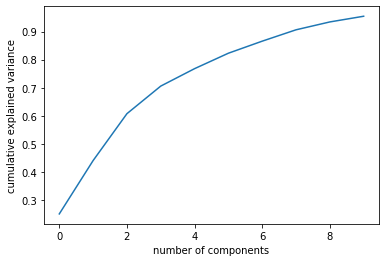

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_daily = data_hourly_imp.reset_index().set_index('DATA').resample('D').mean()
data_daily[data_daily.columns] = scaler.fit_transform(data_daily[data_daily.columns])
interpolated = data_daily.interpolate(method='time', limit_area='inside') 
    
# Principal component analysis (PCA)
model = PCA(0.95)
model.fit(interpolated)
X_pca=model.transform(interpolated)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = interpolated.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
print(dic)

print("shape of X_pca", X_pca.shape)
expl = model.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [14]:
variables=np.delete(data_daily.columns, np.where(np.isin(data_daily.columns, ['CODI_EOI', 'DATA'])))
len(variables)

23

#TODO#

In [15]:
data_air_in = data_air_hourly_imp
datas = pd.DataFrame()
stations=data_air_in['CODI_EOI'].unique()
for station in stations:
    row = {'CODI_EOI':[station]}
    row['NOM_ESTACIO']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'NOM_ESTACIO'].iloc[0]]
    row['TIPUS_ESTACIO']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'TIPUS_ESTACIO'].iloc[0]]
    row['AREA URBANA']=[data_air_stations.loc[data_air_stations["CODI_EOI"] == station,'AREA URBANA'].iloc[0]]
    data=get_data_station(station, data_air_in, data_meteo_hourly, data_trafic).set_index('DATA')
    variables = np.delete(data.columns, np.where(np.isin(data.columns, ['CODI_EOI', 'DATA'])))
    for variable in variables:
        ts = pd.Series(data[variable].values, index=data.index)
        first_valid_index = ts.first_valid_index()
        row[variable] = [None if first_valid_index is None else first_valid_index.strftime('%Y-%m-%d')]
        #last_valid_index = ts.last_valid_index()
        #row[variable+'_last'] = [None if last_valid_index is None else last_valid_index.strftime('%Y-%m-%d')]
    datas = datas.append(pd.DataFrame.from_dict(row), ignore_index=True, sort=False)
datas.set_index('CODI_EOI')
datas

,CODI_EOI,NOM_ESTACIO,TIPUS_ESTACIO,AREA URBANA,CO,NO,NO2,NOX,O3,SO2,DV10,DVVx10,HR,HRn,HRx,P,PPT,PPTx1min,Pn,Px,RS,T,Tn,Tx,VV10,VVx10,estatActual
0,8019054,Barcelona (Parc Vall Hebron),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01
1,8019057,Barcelona (Palau Reial),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01
2,8019004,Barcelona (Poblenou),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01
3,8019050,Barcelona (Ciutadella),background,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01
4,8019044,Barcelona (Gracia - Sant Gervasi),traffic,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01
5,8019043,Barcelona (Eixample),traffic,urban,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2017-10-01


# 3. Creación de los modelos de predicción de contaminantes del aire

#TODO#

In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def calculate_mse(yhat, x, y, scaler, n_out_features=1): 
    
    # invert scaling for forecast
    inv_yhat = np.concatenate((x, yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-n_out_features]
    # invert scaling for actual
    y_test = y.reshape((len(y), n_out_features))
    inv_y = np.concatenate((x, y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-n_out_features]
    
    # calculate RMSE
    mse = mean_squared_error(inv_y, inv_yhat)
    return mse

def calculate_rmse(yhat, x, y, scaler, n_out_features=1): 
       
    # calculate RMSE
    rmse = sqrt(calculate_mse(yhat, x, y, scaler, n_out_features))
    return rmse

#TODO#

In [17]:
from sklearn.ensemble import RandomForestRegressor

class RandomForest_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns = nro_x_columns
        self.nro_y_columns = nro_y_columns
        self.n_steps_in = n_steps_in
        self.n_steps_out = n_steps_out
        
        self.model = RandomForestRegressor(
                        max_features=self.nro_x_columns*self.n_steps_in,
                        n_estimators=self.nro_y_columns*self.n_steps_out,
                        max_depth=2)
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):
        return self.model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):
        return self.model.evaluate(x, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        return self.model.predict(x, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):    
        n_out_features = self.nro_y_columns*self.n_steps_out        
        return calculate_rmse(yhat, x, y, scaler, n_out_features)

#TODO#

In [18]:
from keras.models import Sequential
from keras.layers import Dense

class MLP_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns = nro_x_columns
        self.nro_y_columns = nro_y_columns
        self.n_steps_in = n_steps_in
        self.n_steps_out = n_steps_out
        
        self.model = Sequential()
        self.model.add(Dense(100, activation='relu', input_dim=self.nro_x_columns*self.n_steps_in))
        self.model.add(Dense(self.nro_y_columns*self.n_steps_out))
        self.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):
        return self.model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):
        return self.model.evaluate(x, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        return self.model.predict(x, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):    
        n_out_features = self.nro_y_columns*self.n_steps_out        
        return calculate_rmse(yhat, x, y, scaler, n_out_features)
    

Using TensorFlow backend.


#TODO#

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

class Vanilla_LSTM_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns,self.nro_y_columns = nro_x_columns,nro_y_columns
        self.n_steps_in,self.n_steps_out = n_steps_in,n_steps_out
        
        self.model = Sequential()
        self.model.add(LSTM(50, activation='relu', input_shape=(self.n_steps_in, self.nro_x_columns)))
        self.model.add(Dense(self.nro_y_columns*self.n_steps_out))
        self.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):        
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):      
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.evaluate(X, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.predict(X, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):  
        n_out_features = self.nro_y_columns*self.n_steps_out
        X_test = x.reshape((x.shape[0], x.shape[2]))     
        return calculate_rmse(yhat, x, y, scaler, n_out_features)

#TODO#

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

class Stacked_LSTM_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns,self.nro_y_columns = nro_x_columns,nro_y_columns
        self.n_steps_in,self.n_steps_out = n_steps_in,n_steps_out
        
        self.model = Sequential()
        self.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(self.n_steps_in, self.nro_x_columns)))
        self.model.add(LSTM(50, activation='relu'))
        self.model.add(Dense(self.nro_y_columns*self.n_steps_out))
        self.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):        
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):      
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.evaluate(X, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.predict(X, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):  
        n_out_features = self.nro_y_columns*self.n_steps_out
        X_test = x.reshape((x.shape[0], x.shape[2]))     
        return calculate_rmse(yhat, x, y, scaler, n_out_features)

#TODO#

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

class Bidirectional_LSTM_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns,self.nro_y_columns = nro_x_columns,nro_y_columns
        self.n_steps_in,self.n_steps_out = n_steps_in,n_steps_out
        
        self.model = Sequential()
        self.model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(self.n_steps_in, self.nro_x_columns)))
        self.model.add(LSTM(50, activation='relu'))
        self.model.add(Dense(self.nro_y_columns*self.n_steps_out))
        self.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):        
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):      
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.evaluate(X, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.predict(X, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):  
        n_out_features = self.nro_y_columns*self.n_steps_out
        X_test = x.reshape((x.shape[0], x.shape[2]))     
        return calculate_rmse(yhat, x, y, scaler, n_out_features)

#TODO#

In [22]:
from keras.models import Sequential
from keras.layers import GRU,Activation,Dense

class GRU_Model:
    
    def __init__(self, nro_x_columns, nro_y_columns, n_steps_in=1, n_steps_out=1):
        self.nro_x_columns,self.nro_y_columns = nro_x_columns,nro_y_columns
        self.n_steps_in,self.n_steps_out = n_steps_in,n_steps_out
        
        self.model = Sequential()
        self.model.add(GRU(units=50, input_shape=(self.n_steps_in, self.nro_x_columns)))
        self.model.add(Dense(self.nro_y_columns*self.n_steps_out, activation='linear'))
        self.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        
    def fit(self, x, y, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False):        
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=verbose, shuffle=shuffle)
    
    def evaluate(self, x, y, verbose=0):      
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.evaluate(X, y, verbose=verbose)
    
    def predict(self, x, verbose=0):
        X = x.reshape((x.shape[0], self.n_steps_in, x.shape[1]))
        return self.model.predict(X, verbose=verbose)
    
    def get_rmse(self, yhat, x, y, scaler):  
        n_out_features = self.nro_y_columns*self.n_steps_out
        X_test = x.reshape((x.shape[0], x.shape[2]))     
        return calculate_rmse(yhat, x, y, scaler, n_out_features)

#TODO#

# 5. Evaluación de los modelos de predicción

#TODO#

In [23]:
def prepare_data(data, x_columns, y_columns, n_steps_in=1, n_steps_out=1, dropnan=True):
    Xdata=data[x_columns]
    Ydata=data[y_columns]
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_steps_in, 0, -1):
        cols.append(Xdata.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in x_columns]     
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_steps_out):
        cols.append(Ydata.shift(-i))
        if i == 0:
            names += [('%s(t)' % (col)) for col in y_columns]
        else:
            names += [('%s(t+%d)' % (col, i)) for col in y_columns]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

#TODO#

In [24]:
from sklearn import preprocessing
import time

# Define scaler as MinMaxScaler between 0 to 1
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
      
models = {
        'RandomForest':RandomForest_Model,
        'MLP': MLP_Model,
        'LSTM':Vanilla_LSTM_Model,
        'GRU':GRU_Model,
#        'Stacked LSTM':Stacked_LSTM_Model,
#        'Bidirectional LSTM':Bidirectional_LSTM_Model
    }

data_inputs = {
        'original':data_air_hourly,
        'imputated':data_air_hourly_imp
    }

x_columns_inputs = {
        'total':['CO','NO','NO2','NOX','O3','SO2','DV10','DVVx10','HR','HRn','HRx','P','PPT','PPTx1min','Pn','Px','RS','T','Tn','Tx','VV10','VVx10'],
        'pca_total':['NO','HRx','RS','Px','PPT','DVVx10','estatActual','VV10','SO2','RS'],
        'pca_air_meteo':['NO','HRx','RS','Px','PPT','DVVx10','VV10','SO2','RS'],
        'pca_air':['NO','SO2'],
    }

y_columns=['NOX']

n_steps_in = 1
n_steps_out = 1
        
datas = pd.DataFrame()
stations=data_air_hourly['CODI_EOI'].unique()
#stations=[8019044, 8019050]
total = len(stations) * len(data_inputs) * len(x_columns_inputs) * len(models)
count = 0
for station in stations:
    for data_input in data_inputs:
        data_air = data_inputs[data_input]
        data_daily=get_data_station(station, data_air, data_meteo_hourly, data_trafic).set_index('DATA').resample('D').mean().reset_index()

        #x_columns = np.delete(data_daily.columns, np.where(np.isin(data_daily.columns, ['CODI_EOI', 'DATA'])))  
        #x_columns=['CO','NO','NO2','NOX','O3','SO2','DV10','DVVx10','HR','HRn','HRx','P','PPT','PPTx1min','Pn','Px','RS','T','Tn','Tx','VV10','VVx10']
        
        for x_columns_input in x_columns_inputs:
            x_columns = x_columns_inputs[x_columns_input]
            
            # Prepare data for prediction model
            reframed = prepare_data(data_daily, x_columns, y_columns, n_steps_in, n_steps_out)

            acc = None
            rmse = None
            duration = None
            samples_train = None
            samples_test = None
            for model_name in models:
                count+=1
                progress = count/total * 100
                sys.stdout.write(200*' '+'\r')
                sys.stdout.write(('Progress: \x1b[32m{:.2f}%\x1b[0m Station: \x1b[31m{}\x1b[0m ' + 
                                  'Data: \x1b[31m{}\x1b[0m Inputs: \x1b[31m{}\x1b[0m Model: \x1b[31m{}\x1b[0m  \r')\
                                 .format(progress, station, data_input, x_columns_input, model_name))
                sys.stdout.flush()
                if reframed.shape[0] > 0: 

                    # Interpolate data
                    interpolated = reframed.interpolate(method='time', limit_area='inside')       

                    # Scale data
                    values = interpolated.values.astype('float32')
                    scaled = scaler.fit_transform(values)

                    # Get number of input and output features
                    nro_x_columns = len(x_columns)
                    nro_y_columns = len(y_columns)
                    n_in_features = nro_x_columns*n_steps_in
                    n_out_features = nro_y_columns*n_steps_out

                    # Get X and y samples
                    X = scaled[:,:-n_out_features]
                    y = scaled[:,-n_out_features]

                    # split into train and test sets
                    X_train = X[:int(X.shape[0]*0.8)]
                    X_test = X[int(X.shape[0]*0.8):]
                    y_train = y[:int(X.shape[0]*0.8)]
                    y_test = y[int(X.shape[0]*0.8):]
                    
                    samples_train = X_train.shape[0]
                    samples_test = X_test.shape[0]

                    # Define model
                    model = MLP_Model(nro_x_columns, nro_y_columns, n_steps_in, n_steps_out)

                    # fit model
                    start_time = time.time()
                    history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_split=0.1, verbose=0, shuffle=False)                
                    duration = time.time() - start_time

                    # plot history
                    #plt.plot(history.history['loss'], label='train')
                    #plt.plot(history.history['val_loss'], label='val')
                    #plt.legend()
                    #plt.show()

                    # Evaluate model
                    scores = model.evaluate(X_train, y_train, verbose=0)
                    acc = scores[1]*100

                    yhat = model.predict(X_test, verbose=0)
                    rmse = model.get_rmse(yhat, X_test, y_test, scaler)

                    #yhat = model.predict(X_test)
                    #idxcut=reframed.index[int(X.shape[0]*0.8):]
                    #plt.rc("figure", figsize=(18,6))
                    #plt.plot(idxcut,yhat,label='prediccion')
                    #plt.plot(idxcut,y_test,label='original')
                    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
                    #plt.show()
                          
                row = {}
                row['CODI_EOI'] = [station]            
                row['Data'] = [data_input]         
                row['Samples_train'] = [samples_train] 
                row['Samples_test'] = [samples_test]      
                row['Inputs'] = [x_columns_input]
                row['Model'] = [model_name]
                row['Duration'] = [duration]
                row['Acc'] = [acc]
                row['RMSE'] = [rmse]
                datas = datas.append(pd.DataFrame.from_dict(row), ignore_index=True, sort=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# 6. Presentación de resultados

#TODO#

In [25]:
datas.sort_values(['CODI_EOI']) \
    .groupby(['CODI_EOI'], sort=False) \
    .apply(lambda x: x.sort_values(['RMSE']).head(5)) \
    .reset_index(drop=True)    

,CODI_EOI,Data,Samples_train,Samples_test,Inputs,Model,Duration,Acc,RMSE
0,8019004,imputated,2968,742,total,GRU,5.328954,0.033693,28.901144
1,8019004,imputated,2968,742,total,MLP,5.270359,0.033693,29.094756
2,8019004,imputated,2968,742,total,LSTM,5.265454,0.033693,29.182193
3,8019004,imputated,2968,742,total,RandomForest,5.209911,0.033693,29.541094
4,8019004,imputated,2985,747,pca_air,MLP,5.872847,0.033501,29.609659
5,8019043,imputated,3016,754,total,GRU,3.067964,0.000000,42.619040
6,8019043,imputated,3016,754,total,LSTM,3.027667,0.000000,42.687144
7,8019043,imputated,3016,754,total,RandomForest,2.974365,0.000000,42.764096
8,8019043,imputated,3016,754,total,MLP,2.998823,0.000000,44.083513
9,8019043,original,2641,661,pca_air,LSTM,2.749360,0.000000,44.310404


# Bibliografía

- Na8 (2018). Comprende Principal Component Analysis. https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
